# Part 1: Data preprocessing

dataset: https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho

1. Importing the libraries
2. Importing the dataset
3. Dealing with missing data
4. Encoding categorical variables
5. Splitting the dataset into train and test set
6. Feature scaling

## Importing the libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('/content/car data.csv')

## Exploratory Data Analysis

In [4]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
dataset.shape

(301, 9)

In [5]:
# check the columns
dataset.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [6]:
# information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
# columns with categorical values
dataset.select_dtypes(include=['object']).columns

Index(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [8]:
len(dataset.select_dtypes(include=['object']).columns)

4

In [9]:
# columns with numerical values
dataset.select_dtypes(include=['int64', 'float64']).columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner'], dtype='object')

In [10]:
len(dataset.select_dtypes(include=['int64', 'float64']).columns)

5

In [11]:
# statistical summary
dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


## Dealing with the missing data

In [12]:
# check if there are any null values
dataset.isnull().values.any()

False

In [13]:
# check how many null values
dataset.isnull().values.sum()

0

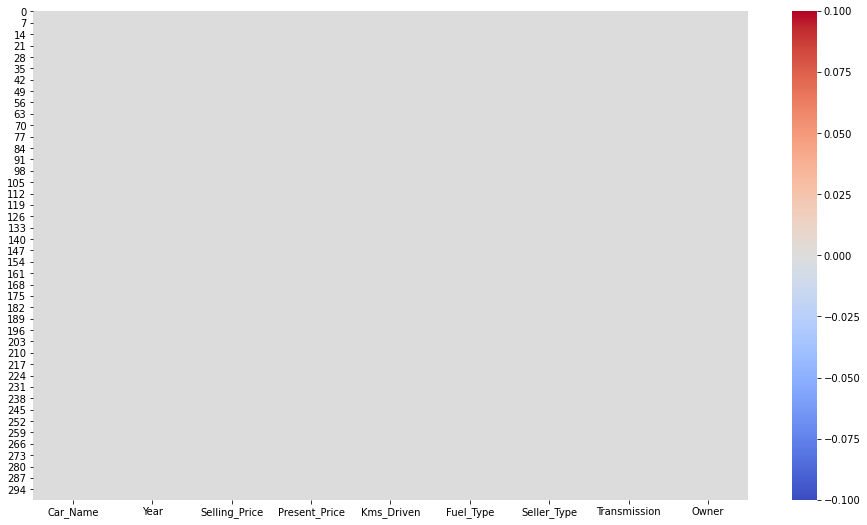

In [14]:
# show the null values using the heatmap
plt.figure(figsize=(16,9))
sns.heatmap(dataset.isnull(), cmap='coolwarm')
plt.show()

## Encoding the categorical data

In [15]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [16]:
dataset.shape

(301, 9)

In [17]:
# check the number of unique values in each column
print(dataset['Car_Name'].nunique())
print(dataset['Fuel_Type'].nunique())
print(dataset['Seller_Type'].nunique())
print(dataset['Transmission'].nunique())
print(dataset['Owner'].nunique())

98
3
2
2
3


In [18]:
# final dataset
dataset = dataset.drop(columns='Car_Name')

In [19]:
dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [20]:
# add a column as current year
dataset['Current Year']=2020

In [21]:
dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [22]:
dataset['years_old'] = dataset['Current Year'] - dataset['Year']

In [23]:
dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year,years_old
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [24]:
dataset = dataset.drop(columns=['Year', 'Current Year'])

In [25]:
dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,years_old
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [26]:
dataset = pd.get_dummies(data=dataset, drop_first=True)

In [27]:
dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,years_old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [28]:
dataset.shape

(301, 9)

## Correlation matrix and Heatmap

In [29]:
dataset_2 = dataset.drop(columns='Selling_Price')

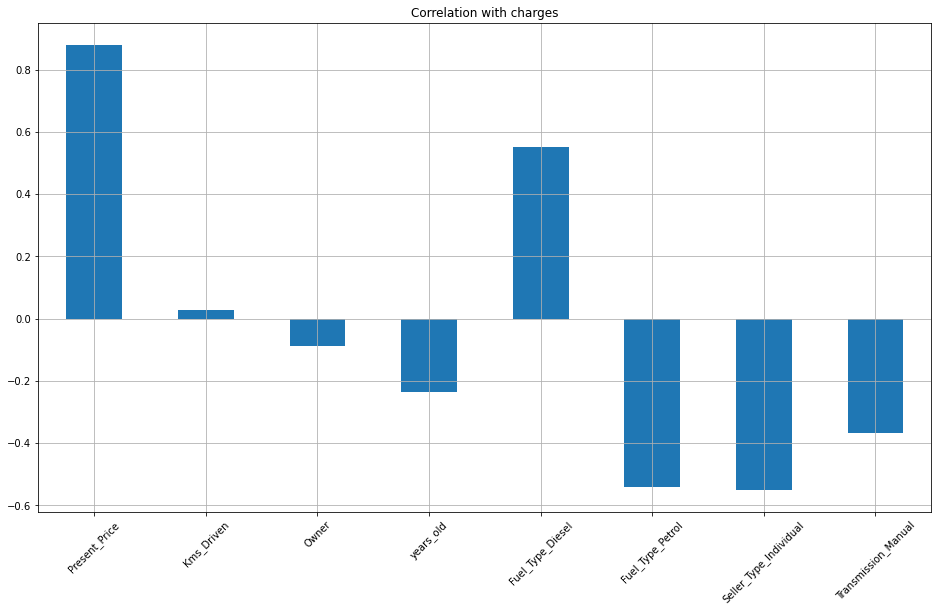

In [30]:
dataset_2.corrwith(dataset['Selling_Price']).plot.bar(
    figsize=(16,9), title = 'Correlation with charges', 
    rot = 45, grid = True
)

In [31]:
# Create Correlation Matrix
corr = dataset.corr()

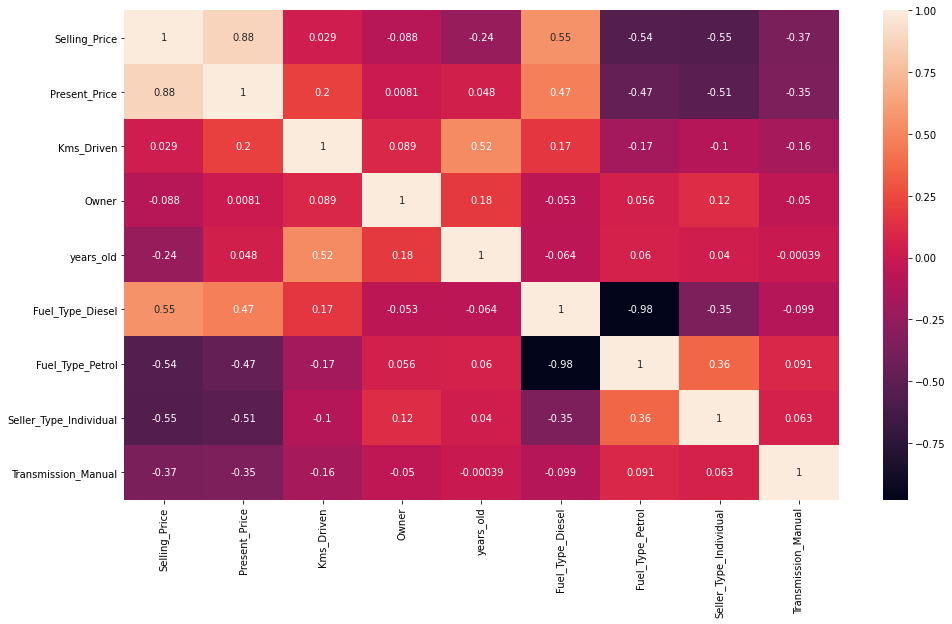

In [32]:
# correlation matrix
plt.figure(figsize=(16,9))
sns.heatmap(corr, annot=True)

## Splitting the dataset into train and test set

In [33]:
dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,years_old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [34]:
x = dataset.iloc[:, 1:].values

In [35]:
x.shape

(301, 8)

In [36]:
y = dataset.iloc[:, 0].values

In [37]:
y.shape

(301,)

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [39]:
x_train.shape

(240, 8)

In [40]:
x_test.shape

(61, 8)

In [41]:
y_train.shape

(240,)

In [42]:
y_test.shape

(61,)

## Feature Importance

In [65]:
from sklearn.ensemble import ExtraTreesRegressor

In [66]:
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [70]:
model.feature_importances_

array([0.39715374, 0.04302403, 0.00047298, 0.07462333, 0.20965764,
       0.02466723, 0.12722171, 0.12317935])

In [73]:
dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,years_old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [81]:
dataset.columns

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'years_old',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual'],
      dtype='object')

In [79]:
index = ['Present_Price', 'Kms_Driven', 'Owner', 'years_old',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual']

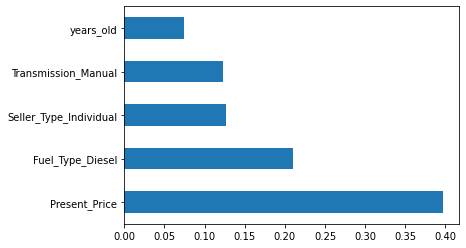

In [80]:
features_imps = pd.Series(model.feature_importances_, index=index)
features_imps.nlargest(5).plot(kind='barh')
plt.show()

# Part 2: Building the model

## 1) Multiple linear regression

In [43]:
# linear regression model
from sklearn.linear_model import LinearRegression
regressor_lr = LinearRegression()
regressor_lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
y_pred = regressor_lr.predict(x_test)

In [45]:
# np.set_printoptions(precision=2)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [45]:
# R^2 (coefficient of determination) regression score function
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7671789069118291

## 2)  Random forest regression

In [46]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor()
regressor_rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [47]:
y_pred = regressor_rf.predict(x_test)

In [82]:
# R^2 (coefficient of determination) regression score function
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8920438443227852

# Part 3: Fing the optimal parameters using RandomizedSearchCV

In [83]:
from sklearn.model_selection import RandomizedSearchCV

In [84]:
parameters = {
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'criterion': ['mse', 'mae'],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20, 50],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']    
    }

In [85]:
parameters

{'criterion': ['mse', 'mae'],
 'max_depth': [10, 20, 30, 40, 50],
 'max_features': ['auto', 'sqrt', 'log2'],
 'min_samples_leaf': [1, 2, 5, 10],
 'min_samples_split': [2, 5, 10, 20, 50],
 'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}

In [86]:
random_forest = RandomizedSearchCV(estimator = regressor_rf, param_distributions = parameters, n_iter=10,
                                   scoring='neg_mean_absolute_error', cv = 5, verbose=2, n_jobs = 1)

In [87]:
random_forest.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=2, max_features=log2, max_depth=30, criterion=mae 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=2, max_features=log2, max_depth=30, criterion=mae, total=   0.9s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=2, max_features=log2, max_depth=30, criterion=mae 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=2, max_features=log2, max_depth=30, criterion=mae, total=   0.9s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=2, max_features=log2, max_depth=30, criterion=mae 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=2, max_features=log2, max_depth=30, criterion=mae, total=   0.9s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=2, max_features=log2, max_depth=30, criterion=mae 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=2, max_features=log2, max_depth=30, criterion=mae, total=   0.9s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=2, max_features=log2, max_depth=30, criterion=mae 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=2, max_features=log2, max_depth=30, criterion=mae, total=   0.9s
[CV] n_estimators=700, min_samples_split=20, min_samples_leaf=5, max_features=log2, max_depth=20, criterion=mae 
[CV]  n_estimators=700, min_samples_split=2

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   47.6s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [88]:
random_forest.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=800, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [89]:
random_forest.best_params_

{'criterion': 'mse',
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 800}

In [90]:
random_forest.best_score_

-0.8243475387097664

# Part 4: Final model (Random forest)

In [91]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=800, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
regressor.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=800, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [92]:
y_pred = regressor_rf.predict(x_test)

In [94]:
# R^2 (coefficient of determination) regression score function
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8920438443227852

# Part 5: Predict charges for a car

In [95]:
dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,years_old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [96]:
single_obs = [[9.54, 3500, 0, 4, 1, 0, 0, 1]]

In [97]:
new_pred = regressor.predict(single_obs)

In [98]:
print(' The predicted selling price for the car is: {} '.format(new_pred))

 The predicted selling price for the car is: [8.08010645] 
